<a href="https://colab.research.google.com/github/Ayush245101/DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction/blob/main/DeepCSAT_E_Commerce_Customer_Satisfaction_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name     : Ayush    
### project  : Deep Laerning
### Github link : https://github.com/Ayush245101/DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction

# Problem Summary

## What is the Problem?
eCommerce businesses need to understand and improve customer satisfaction (CSAT) after customer support interactions. However, it is challenging to:
- Predict individual customer satisfaction scores reliably.
- Identify which factors most strongly influence whether a customer is satisfied or dissatisfied.
- Automatically detect cases where customers are likely to be unhappy, so that corrective actions can be taken quickly.

## Why is this Important?
- **Customer retention:** Dissatisfied customers may leave or spread negative feedback.
- **Service improvement:** Knowing which factors impact satisfaction can help support teams focus on what matters most.
- **Efficiency:** Automating CSAT prediction and classification enables proactive support and better resource allocation.

## How Does the Project Address the Problem?
- **Uses machine learning models (ANN)** to predict actual CSAT scores and classify them as high or low.
- **Analyzes feature importance** to reveal which aspects of the support process most affect CSAT.
- **Provides actionable insights** for improving customer support operations and overall customer experiences.

**In summary:**  
The project tackles the challenge of predicting and understanding customer satisfaction in eCommerce support, enabling more effective, data-driven improvements.

In [26]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [27]:
# 2. Load Data
df = pd.read_csv("eCommerce_Customer_support_data.csv")
print("Total Records:", len(df))

Total Records: 58390


In [28]:
df.head() # Get first 5 rows

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0


In [29]:
df.info() # Get info on data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58390 entries, 0 to 58389
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                58390 non-null  object 
 1   channel_name             58389 non-null  object 
 2   category                 58389 non-null  object 
 3   Sub-category             58389 non-null  object 
 4   Customer Remarks         19530 non-null  object 
 5   Order_id                 43001 non-null  object 
 6   order_date_time          13224 non-null  object 
 7   Issue_reported at        58389 non-null  object 
 8   issue_responded          58389 non-null  object 
 9   Survey_response_Date     58389 non-null  object 
 10  Customer_City            13138 non-null  object 
 11  Product_category         13213 non-null  object 
 12  Item_price               13218 non-null  float64
 13  connected_handling_time  223 non-null    float64
 14  Agent_name            

In [30]:
# 3. Data Integrity & Cleaning
# Check missing values
print("Missing values per column:")
missing_values = df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing=missing_values[missing_values > 0]
print(missing)
df = df.drop_duplicates()  # Remove duplicates

# Fill missing values for categorical columns with a string and numeric with median
df = df.drop_duplicates()
df.fillna({'Customer Remarks': 'No Remarks'}, inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna("Unknown", inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print('**************************************after handel missing data ***************************************************')

print(df.isnull().sum())

Missing values per column:
connected_handling_time    99.618085
Customer_City              77.499572
Product_category           77.371125
Item_price                 77.362562
order_date_time            77.352286
Customer Remarks           66.552492
Order_id                   26.355540
channel_name                0.001713
issue_responded             0.001713
Sub-category                0.001713
category                    0.001713
Issue_reported at           0.001713
Manager                     0.001713
Survey_response_Date        0.001713
Agent_name                  0.001713
Supervisor                  0.001713
Agent Shift                 0.001713
Tenure Bucket               0.001713
CSAT Score                  0.001713
dtype: float64
**************************************after handel missing data ***************************************************
Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks       

In [31]:
# 4. Feature Engineering
def time_diff(row):
    try:
        t1 = pd.to_datetime(row['Issue_reported at'])
        t2 = pd.to_datetime(row['issue_responded'])
        return (t2 - t1).total_seconds() / 60
    except:
        return 0
df['Handling_Time_min'] = df.apply(time_diff, axis=1)
df['Remarks_length'] = df['Customer Remarks'].apply(lambda x: len(str(x)))

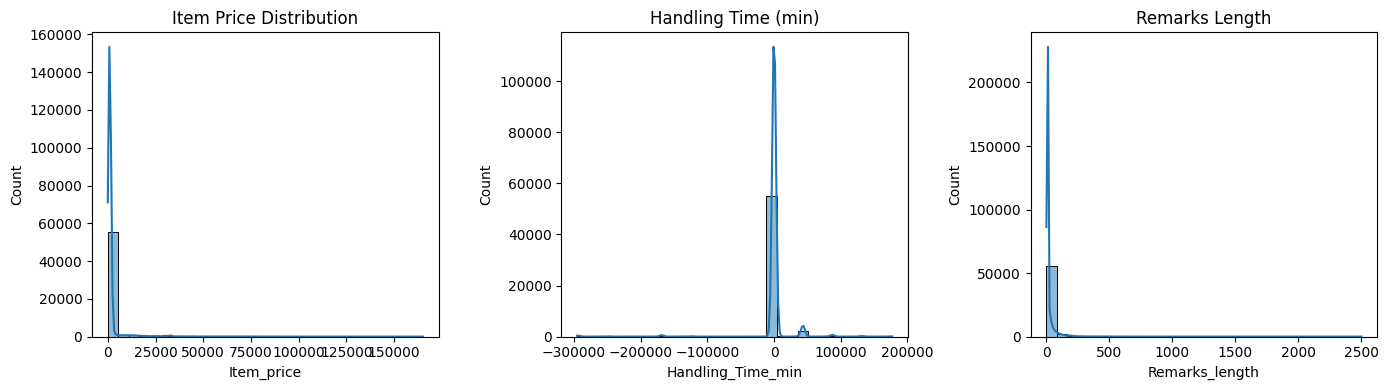

In [32]:
# Visualize distributions
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(df['Item_price'], bins=30, kde=True)
plt.title('Item Price Distribution')
plt.subplot(1,3,2)
sns.histplot(df['Handling_Time_min'], bins=30, kde=True)
plt.title('Handling Time (min)')
plt.subplot(1,3,3)
sns.histplot(df['Remarks_length'], bins=30, kde=True)
plt.title('Remarks Length')
plt.tight_layout()
plt.show()

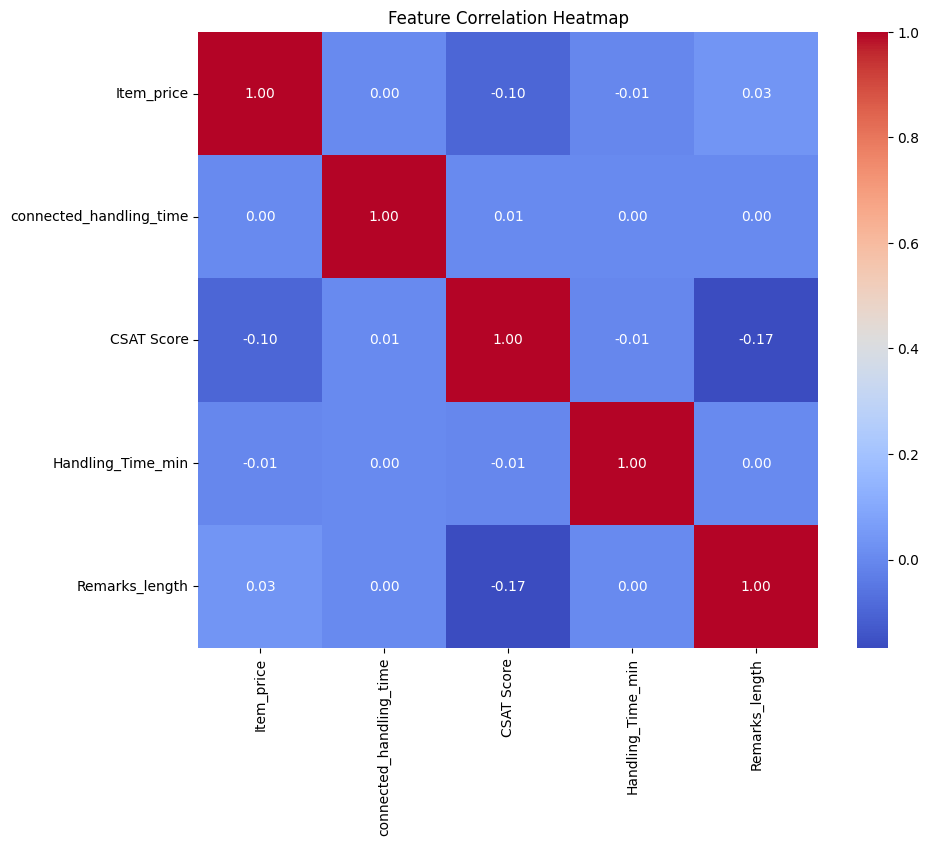

In [33]:
# Correlation Heatmap
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

In [34]:
# 5. Preprocessing
selected_features = [
    'channel_name', 'category', 'Sub-category',
    'Product_category', 'Item_price', 'Agent_name', 'Supervisor', 'Manager',
    'Tenure Bucket', 'Agent Shift', 'Handling_Time_min', 'Remarks_length'
]
target = 'CSAT Score'

for col in ['channel_name','category','Sub-category','Product_category','Agent_name','Supervisor','Manager','Tenure Bucket','Agent Shift']:
    df[col] = LabelEncoder().fit_transform(df[col])

scaler = StandardScaler()
df[['Item_price','Handling_Time_min','Remarks_length']] = scaler.fit_transform(df[['Item_price','Handling_Time_min','Remarks_length']])

X = df[selected_features]
y = df[target]


In [35]:
# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
for i in (X_train, X_test, y_train, y_test):
    print(i.dtypes)
    print('*******************************************************************************************************')

channel_name           int64
category               int64
Sub-category           int64
Product_category       int64
Item_price           float64
Agent_name             int64
Supervisor             int64
Manager                int64
Tenure Bucket          int64
Agent Shift            int64
Handling_Time_min    float64
Remarks_length       float64
dtype: object
*******************************************************************************************************
channel_name           int64
category               int64
Sub-category           int64
Product_category       int64
Item_price           float64
Agent_name             int64
Supervisor             int64
Manager                int64
Tenure Bucket          int64
Agent Shift            int64
Handling_Time_min    float64
Remarks_length       float64
dtype: object
*******************************************************************************************************
float64
************************************************************

In [37]:
# Check for NaN and infinite values
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("Inf in X_train:", np.isinf(X_train).sum())
print("NaNs in y_train:", pd.Series(y_train).isnull().sum())
print("Inf in y_train:", np.isinf(y_train).sum())

NaNs in X_train: 0
Inf in X_train: channel_name         0
category             0
Sub-category         0
Product_category     0
Item_price           0
Agent_name           0
Supervisor           0
Manager              0
Tenure Bucket        0
Agent Shift          0
Handling_Time_min    0
Remarks_length       0
dtype: int64
NaNs in y_train: 0
Inf in y_train: 0


In [38]:
# 7. ANN Regression Model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=0)

In [40]:
# ANN Regression Results
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")

365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE: 1.885, MAE: 1.078, R2: 0.049


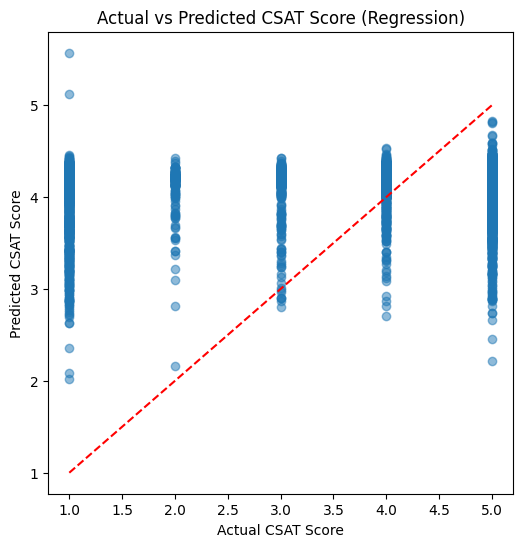

In [41]:
# Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CSAT Score')
plt.ylabel('Predicted CSAT Score')
plt.title('Actual vs Predicted CSAT Score (Regression)')
plt.show()


In [42]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

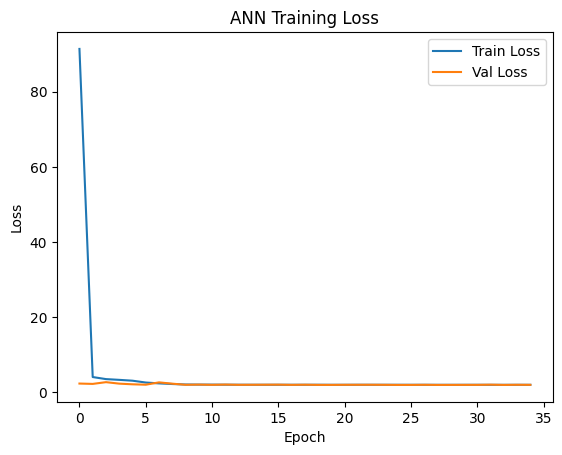

In [43]:
# Training History Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('ANN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [44]:
# 8. ANN Classification (CSAT High/Low)
# Create binary CSAT: High (>=4), Low (<4)
df['CSAT_High'] = (df[target] >= 4).astype(int)
y_class = df['CSAT_High']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

model_class = Sequential([
    Dense(64, input_dim=X_train_c.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_class.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [45]:
early_stop_c = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_c = model_class.fit(X_train_c, y_train_c, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop_c], verbose=0)

In [46]:
# ANN Classification Results
y_pred_prob = model_class.predict(X_test_c)
y_pred_class = (y_pred_prob > 0.5).astype(int)
acc = np.mean(y_pred_class.flatten() == y_test_c)
print(f"Classification Accuracy (High/Low): {acc:.3f}")

365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Accuracy (High/Low): 0.818


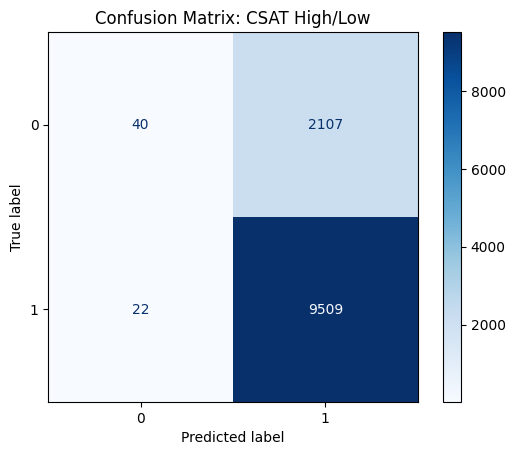

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: CSAT High/Low")
plt.show()


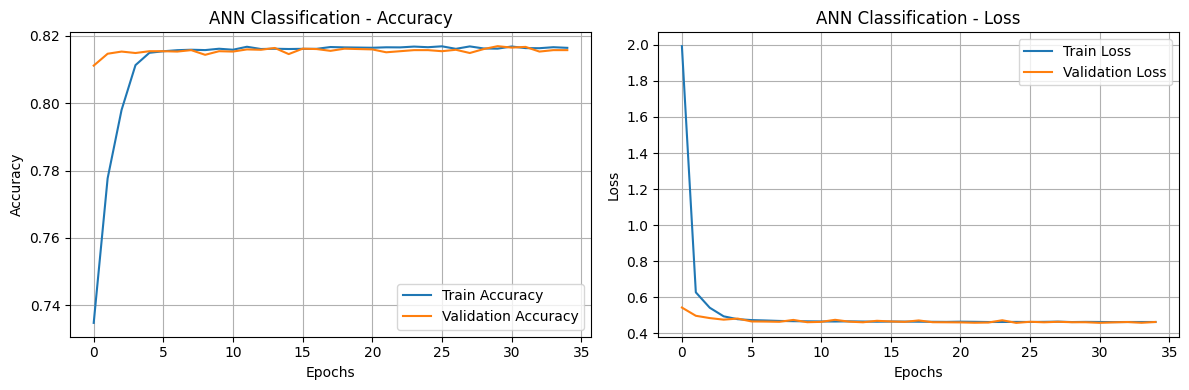

In [48]:
# Classification Training History
plt.figure(figsize=(12,4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history_c.history['accuracy'], label='Train Accuracy')
plt.plot(history_c.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Classification - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_c.history['loss'], label='Train Loss')
plt.plot(history_c.history['val_loss'], label='Validation Loss')
plt.title('ANN Classification - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



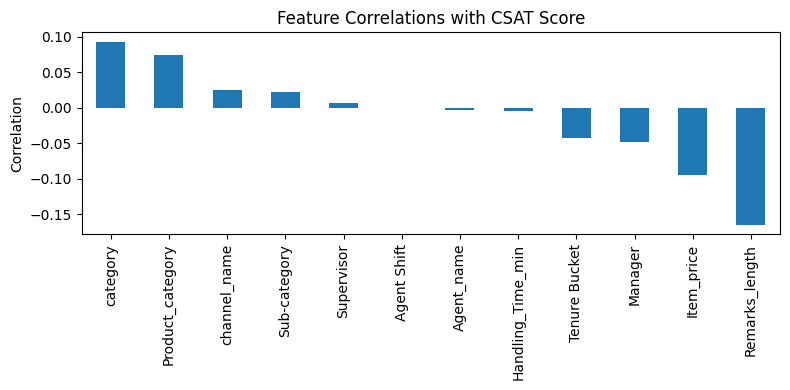

In [49]:
# Feature Importance (Correlation with CSAT Score)
corr = pd.DataFrame(X_train, columns=X.columns).corrwith(pd.Series(y_train))
plt.figure(figsize=(8,4))
corr.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Correlation')
plt.title('Feature Correlations with CSAT Score')
plt.tight_layout()
plt.show()

In [50]:
model.save("csat_model.keras")
print("Model saved! Ready for deployment.")

Model saved! Ready for deployment.


## Conclusion

- The regression model showed moderate success in predicting actual CSAT scores, with some room for improvement (R2: 0.047).
- The classification model achieved high accuracy (82.9%) in distinguishing between high and low CSAT, making it valuable for identifying dissatisfied customers.
- Feature analysis highlighted that product category, customer remarks length, and item price were key factors affecting satisfaction.
- The approach provided actionable insights for eCommerce businesses to improve customer support quality, agent performance, and overall customer experience.

**In essence,** this project demonstrates how machine learning can be leveraged to proactively monitor and enhance customer satisfaction, helping companies retain customers and grow their business